In [1]:
# get tweet from twint 
# prep raw text 

# do tokenize
# do vertorize 
# perform clustering
# show cluster 

# visual clusters
# interprete cluster 
# compare with searching "terms"

# problem statement
# explain all data from searching "terms"
# explian code and cbomments
# show visuals 
# explain interpretion 


# techniuqe 
# N-Gram
# K-Mean
# PCA/LDA

In [2]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

base


In [3]:
!which python

/Users/prachy/opt/miniconda3/bin/python


# SetUp

In [2]:
import os
import math
import pandas as pd
import numpy as np
import marisa_trie
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re
import texthero as hero
import seaborn as sns

from wordcloud import WordCloud
from collections import Counter

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import PCA, LatentDirichletAllocation

from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from pythainlp.corpus import thai_stopwords 
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_words
from pythainlp.util import normalize,isthai,isthaichar,find_keyword
from pythainlp import word_vector, sent_tokenize
from pythainlp.summarize import summarize
# from pythainlp.summarize import extract_keywords

%matplotlib inline

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/prachy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/prachy/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/prachy/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

In [5]:
font_download_url = "https://fonts.google.com/download?family=Noto%20Serif%20Thai"
change_matplotlib_font(font_download_url)

--2022-11-13 01:03:41--  https://fonts.google.com/download?family=Noto%20Serif%20Thai
Resolving fonts.google.com (fonts.google.com)... 2404:6800:4001:803::200e, 142.250.199.14
Connecting to fonts.google.com (fonts.google.com)|2404:6800:4001:803::200e|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘MY_FONT.zip’

     0K .......... .......... .......... .......... ..........  482K
    50K .......... .......... .......... .......... .......... 1.09M
   100K .......... .......... .......... .......... .......... 1.84M
   150K .......... .......... .......... .......... .......... 1.84M
   200K .......... .......... .......... .......... .......... 3.06M
   250K .......... .......... .......... .......... .......... 5.16M
   300K .......... .......... .......... .......... .......... 1.39M
   350K .......... .......... .......... .......... .......... 6.60M
   400K .......... .......... .......... .......... .......... 6.31

Archive:  MY_FONT.zip
  inflating: MY_FONT/OFL.txt         
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Thin.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-ExtraLight.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Light.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Regular.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Medium.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-SemiBold.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Bold.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-ExtraBold.ttf  
  inflating: MY_FONT/static/NotoSerifThai_ExtraCondensed/NotoSerifThai_ExtraCondensed-Black.ttf  
  inflating: MY_FONT/static/NotoSerifThai_Con

In [6]:
pd.set_option('display.max_colwidth', None)

# Load Data

In [7]:
!ls 

MY_FONT               ThaiTextUtility       sna-project2.ipynb
MY_FONT.zip           first_figure.html     tweet_token_clean.csv
README.md             piti
THSarabunNew          play


In [8]:
raw_data1 = pd.read_csv('play/output.csv') # search by keyword กัญชาเสรี
raw_data2 = pd.read_csv('piti/output4.csv') # search by keyword กัญชาการแพทย์

In [9]:
raw_data2_tweet=raw_data2[['tweet']]

In [10]:
# raw_data1

In [11]:
# raw_data2

# Data Exploring 

In [12]:
raw_data1.shape

(9219, 1)

In [13]:
raw_data2.shape

(100, 39)

In [14]:
raw_data1.columns=['tweet']

In [15]:
df = pd.concat([raw_data1, raw_data2_tweet], ignore_index=True).drop_duplicates().reset_index(drop=True)

In [16]:
backup_df = df.copy()

In [17]:
backup_df.sample(5)

,tweet
6348,��OG Sour Diesel🧬 เกรดTop shelf🍁 เด่น Sativa 🧠 THC20% CBD 0.1% 🫁 กลิ่นLemon 🍋 รสชาติเปรี้ยวหวาน 🍭🍬 1กรัม400💸 28 กรัม 9800💸 จัดส่งพัสดุฟรี📦📦 #กัญชากรุงเทพ # #กัญชารังสิต #กัญชาบุรีรัมย์ #กัญชาศาลายา #กัญชาเสรี #กัญชานนทบุรี https://t.co/iymvxfhAuF
7716,คลิกอ่านข่าว : https://t.co/XzyY6pFni3 อนุทินเผยนายกฯกำชับโหวตกฎหมายในสภาทิศทางเดียวกัน ย้ำไม่มีกัญชาเสรี ชี้เป็นวาทกรรมการเมือง หวังตัดแข้งตัดขา #อนุทิน #ภูมิใจไทย #การเมือง #สาธารณสุข #กัญชาเสรี #วาทกรรมการเมือง #กัญชา https://t.co/awdNNExfbi
8197,สนใจสั่งสินค้าทักไลน์กดได้ที่นี่เลย👉🏻 https://t.co/3Ob7uEpezl หรือ แอด Line:alphagaog🧪🫰🏻 STIIIZY Thc Pod /Baked bars พันลำและอื่นๆสนใจทักไลน์ได้เลยครับ #กัญชา #แคปชั่น #บุหรี่ไฟฟ้า #น้ํามันกัญชา #แคปชั่นอ่อย #แคปชั่นเด็ด #โรคซึมเศร้า https://t.co/zDBh8GhiLW
3175,กัญชาระอุ!หัวหน้าพรรคโดดร่วม https://t.co/08UWIi0WGX #หนังสือพิมพ์ #ไทยโพสต์ออนไลน์ #ไทยโพสต์
517,ปัดเกาเหลากัญชา! 'อนุทิน' หัวเราะลั่น บอกเจอ 'จุรินทร์' ในครม.ยกมือไหว้ทุกครั้ง https://t.co/wVskN11MA6 https://t.co/W2Z7sK2oaC


# Text PreProcessing

In [18]:
# import os
# import deepcut
# import re
# from fuzzywuzzy import fuzz

# class ThaiTextUtility:

#     def __init__(self):
#         self.word_list = []
#         self.load_dict()

#     def load_dict(self):
#         dict_path = ['ThaiTextUtility', 'thaiword.txt']
#         dict_path = os.sep.join(dict_path)
#         dict_file = open(dict_path, encoding='utf-8')
#         for word in dict_file:
#             word = word.rstrip()
#             self.word_list.append(word)

#     def lemmatize(self,text):
#         text = re.sub(r'(.)\1+', r'\1\1', text)
#         text_token = deepcut.tokenize(text)
#         for word in text_token:
#             if word in self.word_list:
#                 print(word)
#             else:
#                 for cursor in self.word_list:
#                     fuzz_ratio = fuzz.ratio(word, cursor)
#                     if fuzz_ratio > 85:
#                         print('sugguestion of '+word+' : '+cursor)
                        
# thai_text_util = ThaiTextUtility()

# test_phrase1 = 'ผมก็เออออกับเขาไปเรื่อย'
# test_phrase2 = 'ไปเที่ยวสนุกมากกกกกกกกกกกกกกกกก'

# # print('###########################')
# # thai_text_util.lemmatize(test_phrase1)
# print('###########################')
# thai_text_util.lemmatize(test_phrase2)
# print('###########################')

In [19]:
tags = [tag for tag in raw_data2['hashtags'] if len(tag)!=0]

In [20]:
import ast

tag_dict={}
for tag in tags:
    # fix 20220918: return to string representation as list
    tag=ast.literal_eval(tag)
    for name in tag:
        if name not in tag_dict:
            tag_dict[name] = 1
        else:
            tag_dict[name] = tag_dict[name]+1

In [21]:
tag_df=pd.DataFrame(list(tag_dict.items()),columns=['tag_name','count']).sort_values('count', ascending=False)

<AxesSubplot:xlabel='count', ylabel='tag_name'>

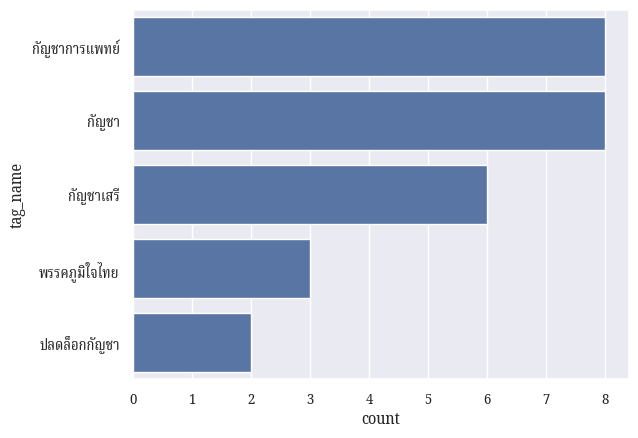

In [22]:
sns.set_theme(style="whitegrid")
sns.set(font="Noto Serif Thai Condensed")
sns.barplot(x="count", y="tag_name", data=tag_df[:5], color="b")

In [23]:
corpus_df=list(set(tag_df['tag_name'].to_list()))

In [24]:
print(corpus_df)

['ประชาธิปัตย์', 'ปลดล็อกกัญชา', 'สยามรัฐออนไลน์', 'เด็ก18ฆ่าเด็ก13', 'รายการคมชัดลึก', 'กัญชาทางการแพทย์', 'สุทิน', 'อนุทิน', 'ข่าวออนไลน์ช่อง8', 'linetoday', 'สมุนไพรไทย', 'กัญชาเชียงใหม่', 'พรรคภูมิใจไทย', 'ใบกัญชา', 'การเมือง', 'topnews', 'สำนักข่าวไทย', 'สุทินคลังแสง', 'ข่าวช่อง8', 'ซึมเศร้า', 'กรีนเบลล์สหคลินิก', 'เสรีกัญชา', 'ไทยรัฐออนไลน์', 'thedailydose', 'ข่าวการเมือง', 'กัญชา', 'healthnews', 'การแพทย์', 'สสส', 'กัญชาลำพูน', 'ข่าววันนี้', 'สยามรัฐ', 'greenbellclinic', 'สายเขียว', 'ฐานเศรษฐกิจ', 'nationtv22', 'นอนไม่หลับ', 'toptv', 'โควิด19', 'nationonline', 'เดลินิวส์', 'สุญญากาศกัญชา', 'น้ำมันหอมสมุนไพร', 'โรงพยาบาล', 'spacebar', 'ยกเลิกกัญชาเสรี', 'พรบกัญชา', 'กัญชง', 'โหนกระแส', 'นอนหลับยาก', 'กัญชาเสรี', 'เครียด', 'ก้าวไกล', 'siamrath', 'หมอวาโย', 'สันทนาการ', 'greenbell', 'ภูมิใจไทย', 'ห้ามใช้กัญชาในเด็กและวัยรุ่น', 'นอนหลับๆตื่นๆ', 'สายเขียวเครดิตฟรี', 'กัญชาการแพทย์', 'กฎหมายกัญชา', 'อภิปรายไม่ไว้วางใจ65', 'siamrathonline', 'ชัยภูมิ', 'พรบกัญชากัญชง', 'พรรคเพื่อไทย', '

## Text Cleaning

In [25]:
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_special_char (text):
    special_char = r"""[~@<>,}{()*:;"'-+=_?"\"/$%^%$!ๆ‘’“”…่่่่่่่่่ạễ•′–0-9]"""
    text = re.sub(special_char, '', text)
    text = text.replace("[", '').replace("]", '').replace('-', '')
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

def clean_text(text):
    text = text.lower().strip()
    text = replace_url(text)
    text = replace_special_char(text)
    text = remove_emoji(text)
    cleaned_text = normalize(text)

    return cleaned_text

In [26]:
df['cleaned_tweet'] = df['tweet'].map(clean_text)

In [27]:
df.head(5)

,tweet,cleaned_tweet
0,"OPEN!! #อัดแท่ง #กรีนแคก ยกโล,ครึ่งโล,ขีด มีราคาส่งพ่อค้า Line : wkpy1512 #เพชรเกษม #ท่าพระ #จรัญ #บางแค #จอมทอง #ดาวคะนอง #ประชาอุทิศ #สุขสวัสดิ์ #พระราม2 #มหาชัย #กระทุ่มแบน #สมุทรสาคร #สายเขียว #กัญชา #กัญชากรุงเทพ #กัญชาอัดแท่ง #กัญชาออแกนิค #กัญชาog #กัญชาราคาส่ง #เนื้อ https://t.co/067Xz8ibR9",open #อัดแทง #กรีนแคก ยกโลครึงโลขีด มีราคาสงพอค้า line wkpy #เพชรเกษม #ทาพระ #จรัญ #บางแค #จอมทอง #ดาวคะนอง #ประชาอุทิศ #สุขสวัสดิ์ #พระราม #มหาชัย #กระทุมแบน #สมุทรสาคร #สายเขียว #กัญชา #กัญชากรุงเทพ #กัญชาอัดแทง #กัญชาออแกนิค #กัญชาog #กัญชาราคาสง #เนื้อ xxurl
1,"OPEN!! #อัดแท่ง เมาๆ ไม่รา #กรีนแคก เหนียวๆ ไม่สาบ ยกโล,ครึ่งโล,ขีด มีราคาส่งพ่อค้า Line : wkpy1512 ไม่ซื้อทักถามก็ยังดี #เนื้อ #กัญชา #กรีนแครก #กัญชาออแกนิก #กัญชาอัดแท่ง #กัญชากทม #กัญชากรุงเทพ #กัญชาส่งด่วน #ส่งGrab #ส่งEMS #ฝั่งธนชนมือ #สายเมา #สายตี้ https://t.co/r3rJoGBE4A",open #อัดแทง เมา ไมรา #กรีนแคก เหนียว ไมสาบ ยกโลครึงโลขีด มีราคาสงพอค้า line wkpy ไมซื้อทักถามก็ยังดี #เนื้อ #กัญชา #กรีนแครก #กัญชาออแกนิก #กัญชาอัดแทง #กัญชากทม #กัญชากรุงเทพ #กัญชาสงดวน #สงgrab #สงems #ฝังธนชนมือ #สายเมา #สายตี้ xxurl
2,เมาควันกัญชาเเระอิเหี้ยมึนขนาดดมไปนิดเดียว,เมาควันกัญชาแระอิเหี้ยมึนขนาดดมไปนิดเดียว
3,"""ศุภชัย​ ใจ​สมุทร""พรรค​ภูมิใจ​ตาย​ ออกมาขู่​""การตัดสินใจ​ของพวกท่าน​ ถ้าพรบ.กัญ​ชา​ไม่ผ่านอาจต้องยุบสภา​ Cr.เมือง​ไทย​ใน​กะลา​ #กัญชาเสรี #พรรคภูมิใจตาย เรื่องเหี้ยๆไว้ใจได้พรรค​ภูมิใจ​ตาย​😡😡😡😡😡 https://t.co/XDFnFPo7dP",ศุภชัย ใจสมุทรพรรคภูมิใจตาย ออกมาขูการตัดสินใจของพวกทาน ถ้าพรบ.กัญชาไมผานอาจต้องยุบสภา cr.เมืองไทยในกะลา #กัญชาเสรี #พรรคภูมิใจตาย เรืองเหี้ยไว้ใจได้พรรคภูมิใจตาย xxurl
4,สวัสดีวันลอยกะทงครับ @ไลน์ https://t.co/1hryFTS0mj ✅✅ #กัญชา #สายเขียว #ดอกog #weed #thc #exotic #ขายกัญชา #พันลํา #พันลําog #กัญชา #กัญชา #กัญชาog #กัญชาออแกนิค #กัญชานนทบุรี #กัญชากรุงเทพ #กัญชากทม #กัญชาไทย #กัญชานอก #กัญชาบางบัวทอง #นอนไม่หลับ #กัญชาไทรน้อย #กัญชาบางใหญ่ https://t.co/2kuKGvUaKZ,สวัสดีวันลอยกะทงครับ ไลน์ xxurl #กัญชา #สายเขียว #ดอกog #weed #thc #exotic #ขายกัญชา #พันลำ #พันลำog #กัญชา #กัญชา #กัญชาog #กัญชาออแกนิค #กัญชานนทบุรี #กัญชากรุงเทพ #กัญชากทม #กัญชาไทย #กัญชานอก #กัญชาบางบัวทอง #นอนไมหลับ #กัญชาไทรน้อย #กัญชาบางใหญ xxurl


In [28]:
df2=df.copy()

## More Cleasing

In [29]:
added_words1 = ['ยกโล','ราคาส่ง','ครึ่งโล','กัญชาอัดแท่ง','งานดอกสายพันธุ์','มีของพร้อมส่งจริง','เนื้อล้วน']
added_words2 = ['ลอยกระทง','กัญชาอัดแทง','กัญชาเสรี','กัญชาการแพทย์','กัญชาออแกนิค','กลุ่ม','กัญชาทางการแพทย์','กัญชาไฟฟ้า','กัญชากรุงเทพ','การแพทย์','กัญชานอก','สายขียว']
added_words3 = ['กัญชาเชียงใหม','กัญชาขอนแกน','กัญชารามคําแหง','กัญชาลาดพร้าว','กัญชารามอินทรา','กัญชารังสิต','กัญชาออแกนิก','กัญชาอุบลราชธานี','กัญชารังสิต','กัญชานนทบุรี','กัญชาเมืองทอง','กัญชากรุงเทพ','กัญชานนทบุรี','กัญชาพัทยา','กัญชาลาดกระบัง','กัญชาบางนา','กัญชากทม','กัญชาราชบุรี','กัญชาลําพูน']
added_words4 = ['สุทิน','ศุภชัย','อนุทิน','ภูมิใจไทย','ประชาธิปัตย์','ภูมิใจไทย','พ.ร.บ.สุราก้าวหน้า','ก้าวไกล','จุรินทร์','สาทิตย์','นิพนธ์','หางกระรอก','หางเสือ','สุราก้าวหน้า','ฝายค้าน','อิหนู','หมอหนู']
added_words5 = corpus_df

punc1 = ['"','“','”','ๆ','!','-','\xa0•••',"‘",')','(','0','1','2','3','4','5','6','7','8','9','...','.','/',"’",':','%',"'",'#']
punc2 = ['\n','',' ', '⭐️' ,'?', '??','?‍♀️??‍♂️','❤️',':)','^ ^','^']
punc3 = ['✅','😡','@','✅✅', 'xxurl','🚨🚨','&gt;&gt;','🤤❤️‍🔥','✨ 🍰','🌞🍀','😅😅',
         '👉👉','❤️','��🏻','🤩🎉','💳','🥦','🍀✨','💯✅','💯','👇👇','👇','��',
        '🌳🔥😁','🔥','💯','️⃣️⃣ ️⃣️⃣️⃣','️⃣️⃣','✅✨','✅ ','🌱🌱','🛵📦']
pun4 = ['......','..','....','.....','......','.......','........','..........','.............','..............','.....................'] 

final_punc = set(punc1 + punc2 + punc3 + pun4)
final_added_words = set(added_words1 + added_words2 + added_words3 + added_words4 + added_words5)

In [30]:
print(final_punc)

{'', '?\u200d♀️??\u200d♂️', '.......', '🤤❤️\u200d🔥', '❤️', '..', '🌱🌱', '7', ')', '5', '💯', '️⃣️⃣ ️⃣️⃣️⃣', '.', '🔥', '✅✅', '2', '🛵📦', '0', '��🏻', '&gt;&gt;', '(', '........', '🤩🎉', 'xxurl', '🚨🚨', '?', '👉👉', '#', '1', "'", '��', '🌞🍀', '.............', '️⃣️⃣', '’', '.....................', '%', '.....', '😡', '8', '..............', '!', '\n', '💳', '👇', '‘', '9', '✅✨', 'ๆ', ':)', '✨ 🍰', '??', '💯✅', '^ ^', '✅', '......', ' ', '😅😅', '/', '🌳🔥😁', '3', '⭐️', '"', '@', '“', '^', '✅ ', '👇👇', '..........', '\xa0•••', '🥦', '-', '...', ':', '🍀✨', '6', '4', '”', '....'}


In [31]:
print(final_added_words)

{'สยามรัฐออนไลน์', 'รายการคมชัดลึก', 'อิหนู', 'ศุภชัย', 'อนุทิน', 'พรรคภูมิใจไทย', 'กัญชากทม', 'topnews', 'สุทินคลังแสง', 'กัญชาลาดกระบัง', 'กัญชาออแกนิก', 'กัญชา', 'การแพทย์', 'กัญชาอัดแทง', 'ข่าววันนี้', 'กัญชาไฟฟ้า', 'โควิด19', 'เดลินิวส์', 'สายขียว', 'ยกเลิกกัญชาเสรี', 'โหนกระแส', 'กัญชาราชบุรี', 'สันทนาการ', 'หางเสือ', 'งานดอกสายพันธุ์', 'พรบกัญชากัญชง', 'ฝายค้าน', 'กัญชาทางการแพทย์', 'กัญชานอก', 'ข่าวออนไลน์ช่อง8', 'สมุนไพรไทย', 'สำนักข่าวไทย', 'กัญชากรุงเทพ', 'ซึมเศร้า', 'กัญชานนทบุรี', 'thedailydose', 'กลุ่ม', 'กัญชารามอินทรา', 'สสส', 'สยามรัฐ', 'ฐานเศรษฐกิจ', 'นอนไม่หลับ', 'สุญญากาศกัญชา', 'ครึ่งโล', 'สาทิตย์', 'น้ำมันหอมสมุนไพร', 'โรงพยาบาล', 'มีของพร้อมส่งจริง', 'นอนหลับๆตื่นๆ', 'สายเขียวเครดิตฟรี', 'กัญชาการแพทย์', 'นิพนธ์', 'กฎหมายกัญชา', 'กัญชาบางนา', 'พรรคเพื่อไทย', 'ประชาธิปัตย์', 'เด็ก18ฆ่าเด็ก13', 'ยกโล', 'linetoday', 'กรีนเบลล์สหคลินิก', 'เสรีกัญชา', 'ไทยรัฐออนไลน์', 'healthnews', 'greenbellclinic', 'กัญชาพัทยา', 'สุราก้าวหน้า', 'spacebar', 'พรบกัญชา', 'กัญชาเสรี', '

In [32]:
all_words = set(thai_words()) 

In [33]:
len(all_words)

62055

In [34]:
for word in final_added_words:
    all_words.add(normalize(word))

In [35]:
len(all_words)

62140

In [36]:
c_dict = marisa_trie.Trie(all_words)

def cut_words(tweet):
    # atta-cut is default now
    tokens = word_tokenize(tweet, custom_dict=c_dict, keep_whitespace=False)
    tokens = [token for token in tokens if token not in final_punc]
    tokens = [token for token in tokens if token not in list(thai_stopwords())]
    tokens = [token for token in tokens if len(token) > 1]
    # tokens = [token if isthai(token) else token if token in words.words() else None for token in tokens]
    # tokens = [token for token in tokens if token is not None]
    return ' '.join(tokens)

def cut_more_words(tweet):
    tokens = word_tokenize(tweet, custom_dict=c_dict, keep_whitespace=False)
    # tokens = [token if token in words.words() else token if isthai(token) else None for token in tokens]
    tokens = [token for token in tokens if isthai(token)]
    tokens = [token for token in tokens if token[0] != '.']
    return ' '.join(tokens)
    
def extract_words(tweet):
    words = ''
    for token in tweet.split():
        if token[0] == '#':
            continue
        elif 'http' in token or 'www' in token:
            continue
        else:
            words += ' ' + cut_words(token)
        return words

In [37]:
"matichononline" in words.words()

False

In [38]:
isthai('เนวิน')

True

In [39]:
df.iloc[9140:9143]

,tweet,cleaned_tweet
9140,@MatichonOnline What????แล้วพรรคคุณ เปิดกัญชาเสรีออกมานี่นะ แล้วบอกต่อต้านอบายมุข ลืมแปลงฟันหรือเปล่าคุณเนวิน🤔,matichononline whatแล้วพรรคคุณ เปิดกัญชาเสรีออกมานีนะ แล้วบอกตอต้านอบายมุข ลืมแปลงฟันหรือเปลาคุณเนวิน🤔
9141,��𝕐.𝔹𝕒𝕟𝕘 ℙ𝕖𝕥𝕖 𝕆𝔾𝕋𝕙𝕒𝕚𝕝.🍃🍂 คีฟ+ดอกร่วง การันตีไม่มีกลิ่นฉุนงานหอมแน่นอน ✅ รีบสั่งก่อนจะหมดนะครับ 🥰 10G/200 ฿ #คีฟกัญชาเเท้ #กัญชาอัดเเท่ง #กัญชานครพนม #กัญชาออแกนิค #กัญชานอก #มีบริกาส่งทั่วประเทศ✅ https://t.co/9MHTMlU5XI,. ℙ . คีฟดอกรวง การันตีไมมีกลินฉุนงานหอมแนนอน รีบสังกอนจะหมดนะครับ 🥰 g ฿ #คีฟกัญชาแท้ #กัญชาอัดแทง #กัญชานครพนม #กัญชาออแกนิค #กัญชานอก #มีบริกาสงทัวประเทศ xxurl
9142,คละสายพันธ์ได้ มีเรทยก เช็คเครดิตในกลุ่มได้จ้า กลุ่ม &gt;&gt; https://t.co/XPL8me1E57? #กัญชา #กัญชาอัดแท่ง #กัญชากรุงเทพ #กทม #อ่อนนุช #ชลบุรี #พงัน #ชลบุรี #ภูเก็ต #เชียงใหม่ #สาทร #ทองหล่อ #สุขุมวิท #เอกมัย #หัวหิน #สมุทรปราการ #รังสิต #พัทยา #บางนา #ลาดพร้าว #ประชาอุทิศ #กัญชาOG https://t.co/8dUlzTaQwi,คละสายพันธ์ได้ มีเรทยก เช็คเครดิตในกลุมได้จ้า กลุม &gt&gt xxurl #กัญชา #กัญชาอัดแทง #กัญชากรุงเทพ #กทม #ออนนุช #ชลบุรี #พงัน #ชลบุรี #ภูเก็ต #เชียงใหม #สาทร #ทองหลอ #สุขุมวิท #เอกมัย #หัวหิน #สมุทรปราการ #รังสิต #พัทยา #บางนา #ลาดพร้าว #ประชาอุทิศ #กัญชาog xxurl


In [40]:
df['cleaned_tweet'].iloc[9140]

'matichononline whatแล้วพรรคคุณ เปิดกัญชาเสรีออกมานีนะ แล้วบอกตอต้านอบายมุข ลืมแปลงฟันหรือเปลาคุณเนวิน🤔'

In [41]:
cut_words(df['cleaned_tweet'].iloc[9140])

'matichononline what พรรค กัญชาเสรี มานี ตอ ต้าน อบายมุข ลืม แปลง ฟัน เปลา เนวิน'

In [42]:
# for word in 'khaosodonline ยุบ เสียง .. ไม เห็นด้วย นโยบาย กัญชา ยู ..'.split(' '):
#     if word in words.words():
#         print(word)
#     elif isthaichar(word):
#         print(word)
#     elif isthai(word):
#         print(word)

In [43]:
'..' in words.words()

False

In [44]:
df['token_tweet'] = df['cleaned_tweet'].map(cut_words)

In [45]:
df.iloc[9140:9143]

,tweet,cleaned_tweet,token_tweet
9140,@MatichonOnline What????แล้วพรรคคุณ เปิดกัญชาเสรีออกมานี่นะ แล้วบอกต่อต้านอบายมุข ลืมแปลงฟันหรือเปล่าคุณเนวิน🤔,matichononline whatแล้วพรรคคุณ เปิดกัญชาเสรีออกมานีนะ แล้วบอกตอต้านอบายมุข ลืมแปลงฟันหรือเปลาคุณเนวิน🤔,matichononline what พรรค กัญชาเสรี มานี ตอ ต้าน อบายมุข ลืม แปลง ฟัน เปลา เนวิน
9141,��𝕐.𝔹𝕒𝕟𝕘 ℙ𝕖𝕥𝕖 𝕆𝔾𝕋𝕙𝕒𝕚𝕝.🍃🍂 คีฟ+ดอกร่วง การันตีไม่มีกลิ่นฉุนงานหอมแน่นอน ✅ รีบสั่งก่อนจะหมดนะครับ 🥰 10G/200 ฿ #คีฟกัญชาเเท้ #กัญชาอัดเเท่ง #กัญชานครพนม #กัญชาออแกนิค #กัญชานอก #มีบริกาส่งทั่วประเทศ✅ https://t.co/9MHTMlU5XI,. ℙ . คีฟดอกรวง การันตีไมมีกลินฉุนงานหอมแนนอน รีบสังกอนจะหมดนะครับ 🥰 g ฿ #คีฟกัญชาแท้ #กัญชาอัดแทง #กัญชานครพนม #กัญชาออแกนิค #กัญชานอก #มีบริกาสงทัวประเทศ xxurl,คีฟ ดอก รวง การันตี ไม ลิ ฉุน งาน หอม แนน อน รีบ สัง กอ #คีฟ กัญชา กัญชาอัดแทง กัญชา นครพนม กัญชาออแกนิค กัญชานอก ริ กา สง ทัว ประเทศ
9142,คละสายพันธ์ได้ มีเรทยก เช็คเครดิตในกลุ่มได้จ้า กลุ่ม &gt;&gt; https://t.co/XPL8me1E57? #กัญชา #กัญชาอัดแท่ง #กัญชากรุงเทพ #กทม #อ่อนนุช #ชลบุรี #พงัน #ชลบุรี #ภูเก็ต #เชียงใหม่ #สาทร #ทองหล่อ #สุขุมวิท #เอกมัย #หัวหิน #สมุทรปราการ #รังสิต #พัทยา #บางนา #ลาดพร้าว #ประชาอุทิศ #กัญชาOG https://t.co/8dUlzTaQwi,คละสายพันธ์ได้ มีเรทยก เช็คเครดิตในกลุมได้จ้า กลุม &gt&gt xxurl #กัญชา #กัญชาอัดแทง #กัญชากรุงเทพ #กทม #ออนนุช #ชลบุรี #พงัน #ชลบุรี #ภูเก็ต #เชียงใหม #สาทร #ทองหลอ #สุขุมวิท #เอกมัย #หัวหิน #สมุทรปราการ #รังสิต #พัทยา #บางนา #ลาดพร้าว #ประชาอุทิศ #กัญชาog xxurl,คละ สาย พันธ์ เรท เช็ค เครดิต ลุ ลุ gt gt กัญชา กัญชาอัดแทง กัญชากรุงเทพ กทม ออน นุช ชลบุรี #พ งัน ชลบุรี ภูเก็ต เชียง ใหม สาทร ทอง หลอ สุขุมวิท เอกมัย หัว หิน สมุทรปราการ รังสิต พัทยา บางนา ลาดพร้าว ประชา อุทิศ กัญชา og


In [46]:
df.shape

(9239, 3)

### Test Thai Words

In [47]:
df['tweet'].iloc[15]

'@KhaosodOnline ยุบเลย 1 เสียง.. เพราะไม่เห็นด้วยกับนโยบายกัญชาอยู่แล้ว..'

In [48]:
df['token_tweet'].iloc[15]

'khaosodonline ยุบ เสียง ไม เห็นด้วย นโยบาย กัญชา ยู'

In [49]:
cut_more_words(df['token_tweet'].iloc[15])

'ยุบ เสียง ไม เห็นด้วย นโยบาย กัญชา ยู'

In [50]:
# word_tokenize(df['token_tweet'].iloc[15])

In [51]:
df['clean_token_tweet'] = df['token_tweet'].map(cut_more_words)

In [52]:
df.to_csv('tweet_token_clean.csv',encoding ='utf-8') 

In [53]:
df.shape

(9239, 4)

# Modeling

## Vertorization

In [54]:
# for i in df['token_tweet']:
#     print(i)

In [55]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform(df['clean_token_tweet'])

In [56]:
# (9239, 11817) before check word is thai? and in eng dict?
X.shape

(9239, 8153)

In [57]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())[0:100]

,ก.,ก.พ.,ก.ม.,ก.ย.,กก,กก.,กค,กงจักร,กช,กฎ,...,์นี,์มอล,์ย,๑๐,๑๑,๑๑๑,๑๕๒,๕๐,๕๕๕,๖๕
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
print(vectorizer.get_feature_names_out()[:10])

['ก.' 'ก.พ.' 'ก.ม.' 'ก.ย.' 'กก' 'กก.' 'กค' 'กงจักร' 'กช' 'กฎ']


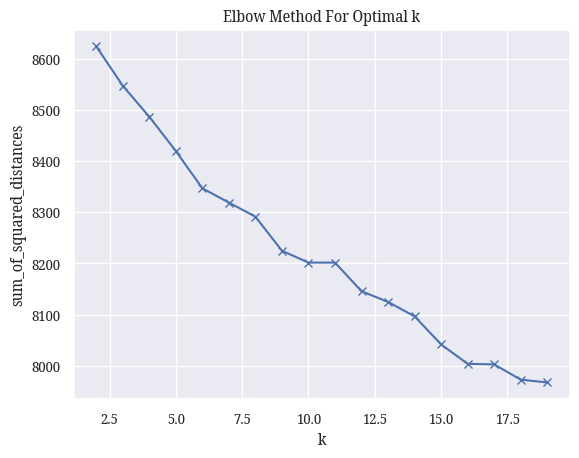

In [60]:
err = []
start_k=2
max_k=20

for k in range(start_k, max_k):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10).fit(X)
    err.append(km.inertia_)
    
plt.plot([i for i in range(start_k, max_k)], err, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### K Mean Clustering

In [61]:
true_k=10
km=KMeans(n_clusters=true_k).fit(X)
c=km.cluster_centers_

In [62]:
sorted(Counter(list(km.labels_)).most_common())

[(0, 64),
 (1, 646),
 (2, 3292),
 (3, 257),
 (4, 196),
 (5, 1508),
 (6, 258),
 (7, 517),
 (8, 1018),
 (9, 1483)]

In [63]:
# get centroid and order 
# vectorizer.get_feature_names() ?? 
for i in range(true_k):
    print("cluster:#{}".format(i))
    word_tuples = [(c[i][j], vectorizer.get_feature_names_out()[j]) for j in range(len(c[i]))]
    word_tuples.sort(reverse=True)
    print(' '.join([str(j) for i,j in word_tuples[:10]]))
    print("-----")

cluster:#0


/Users/prachy/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


แคป ชัน ทัก เด็ด ซึมเศร้า โรค สนใจ ไลน์ ไฟฟ้า น้ำมัน
-----
cluster:#1
เพือ อนุทิน ขาว กัญชา การแพทย์ ราง พรรค ไม พ.ร.บ. การเมือง
-----
cluster:#2
กัญชา กัญชาเสรี ผม เมา วา ใส คน เสรี กวา เหมือน
-----
cluster:#3
รัชดา จังหวัด กัญชา โชค ชัย ตาง ขาย พันลำ กัญชาออแกนิค ลาดพร้าว
-----
cluster:#4
รังสิต คลอง กรุงเทพ กัญชา หลวง มอ กัญชารังสิต นคร สง ไท
-----
cluster:#5
กัญชา กัญชากรุงเทพ กัญชาเสรี กัญชาอัดแทง กัญชาออแกนิค สง กัญชาเชียงใหม สัง พันลำ ราคา
-----
cluster:#6
เชียง กัญชาเชียงใหม ใหม นัด กัญชา ดอก สง กัญชาออแกนิค ติด ตอ
-----
cluster:#7
ขีด สง กัญชา กัญชาอัดแทง ครึ โล อัด ไลน์ กรัม แทง
-----
cluster:#8
กัญชา กัญชานอก กัญชากรุงเทพ พันลำ กัญชานนทบุรี กัญชาออแกนิค สง ดอก ขาย กัญชารังสิต
-----
cluster:#9
ไม แต กัญชา วา คน กวา ผา สุรา เสรี กัญชาเสรี
-----


In [64]:
result={'cluster':km.labels_, 'message':df['clean_token_tweet']}
df2=pd.DataFrame(result)

In [65]:
df2.sample(5)

,cluster,message
4530,9,โอ้ย เทียบ ไม ยา หา วา สอน เพิง โควิด ทอง เทียว แห บอ กวา กัญชา ไม เวท
8662,7,ขนมหวาน คนจริง งาน ไมสง ยอด รับประกัน ดี ใหญ จี จี จี ครึ ขีด ขีด ถุง ครึ มัด มัด กัญชา ขีด มุ ม. ครึ โล โล เฮโรอีน จี จี จี เค ตามิน จี
4495,4,โปรโมชัน สายไหม กัญชาอัดแทง สะพาน ใหม รังสิต พหลโยธิน กัญชาเสรี กัญชา สิน วัชร พล ขาย กัญชา เกษตร เขน เกษตร ดอนเมือง มอ รังสิต รังสิต เมือง เอก
5887,9,แม รู้ วา ปลูก กัญชา ตอนแรก วา แม วา แต แมก ลับ ชม วา เก ให้กำลังใจ โชค ดีจริง แม นา รัก แบบนี้
5319,8,โปรโมชัน งาน ลิ นร ชาติ ความเมา เต็ม แนน อน เช็ค เครดิต ลุ ไลน์ กัญชา กัญชา ไทย กัญชา กัญชานอก กัญชาออแกนิค พันลำ กัญชา ด้าย แดง กัญชา โอจี ดอก กัญชา


### wordCloud

In [66]:
!ls ./THSarabunNew/THSarabunNew.ttf

./THSarabunNew/THSarabunNew.ttf


In [67]:
path = './THSarabunNew/THSarabunNew.ttf'

In [68]:
regexp = r"[ก-๙a-zA-Z']+"

In [69]:
backup_df2=df2.copy()

Cluster: 0


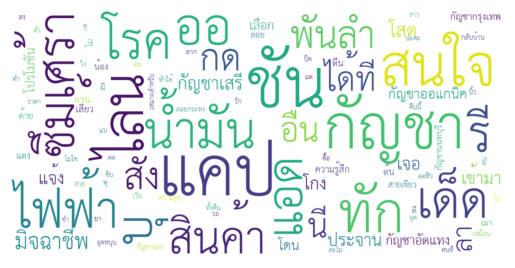

Cluster: 1


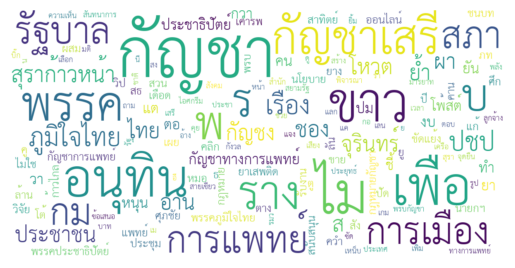

Cluster: 2


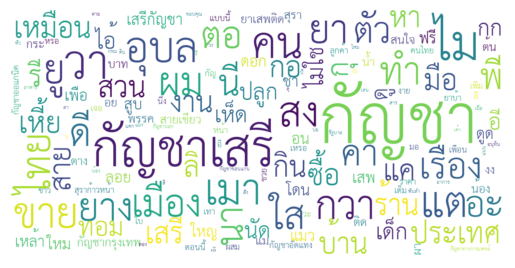

Cluster: 3


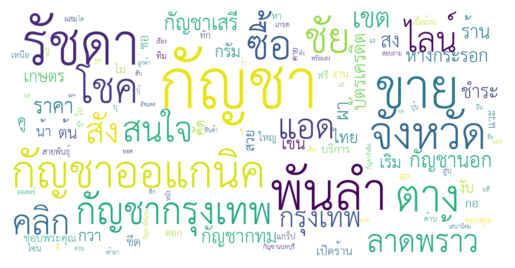

Cluster: 4


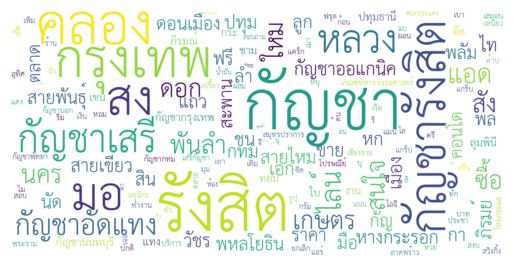

Cluster: 5


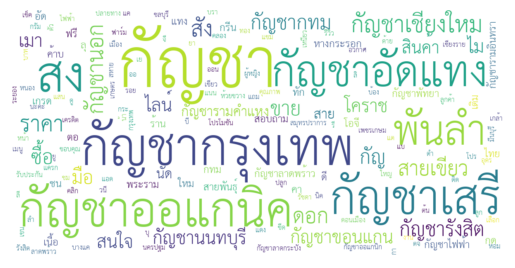

Cluster: 6


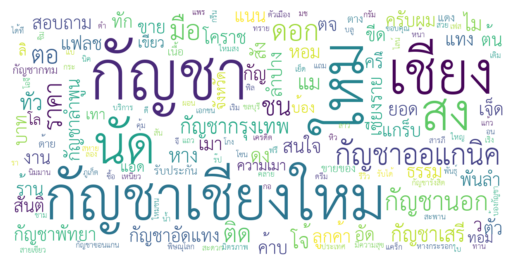

Cluster: 7


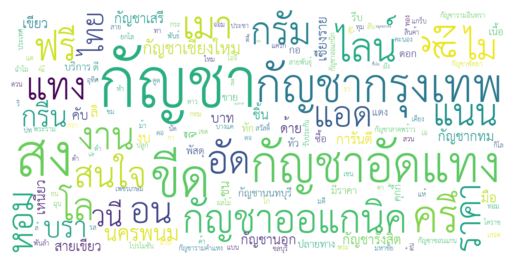

Cluster: 8


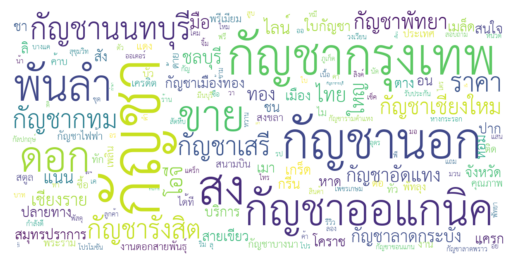

Cluster: 9


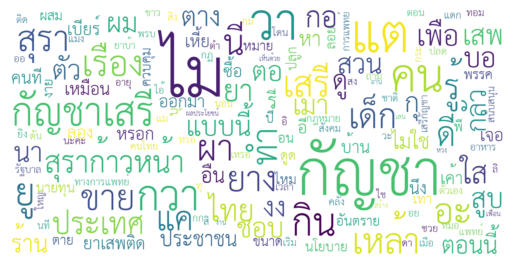

In [70]:
# relative_scalingfloat (default=’auto’)
# Importance of relative word frequencies for font-size. 
# With relative_scaling=0, only word-ranks are considered. 
# With relative_scaling=1, a word that is twice as frequent will have twice the size. 
# If you want to consider the word frequencies and not only their rank, relative_scaling around .5 often looks good. 
# If ‘auto’ it will be set to 0.5 unless repeat is true, in which case it will be set to 0.
for k in range(0, true_k):
    s=df2[df2.cluster==k]
    text=s['message'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(font_path=path, 
                          relative_scaling=0.3,
                          max_font_size=80, 
                          max_words=150, 
                          min_font_size=2,
                          background_color="white",
                          collocations=False,
                          scale=3,
                          font_step=4,
                          regexp=regexp,
                          margin=2
                         ).generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Interpretion

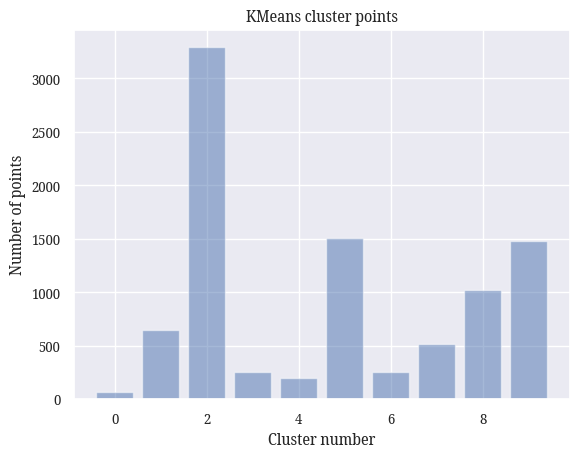

In [71]:
# visually how data points distributed across K clusters 
plt.bar([x for x in range(true_k)], df2.groupby(['cluster'])['message'].count(), alpha = 0.5)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

# Cluster visualization

In [73]:
df2['tfidf'] = (
    df2['message']
    .pipe(hero.clean)
    .pipe(hero.tfidf)
)

In [74]:
X=df2['tfidf']
if isinstance(X, pd.DataFrame):
    input_matrix_coo = X.sparse.to_coo()
    input_matrix_for_vectorization = input_matrix_coo.astype("float64")
else:
    input_matrix_for_vectorization = list(X)

In [75]:
desierd_clusters=10

In [76]:
km = KMeans(n_clusters=desierd_clusters, max_iter=200, n_init=10)
model = km.fit(input_matrix_for_vectorization)

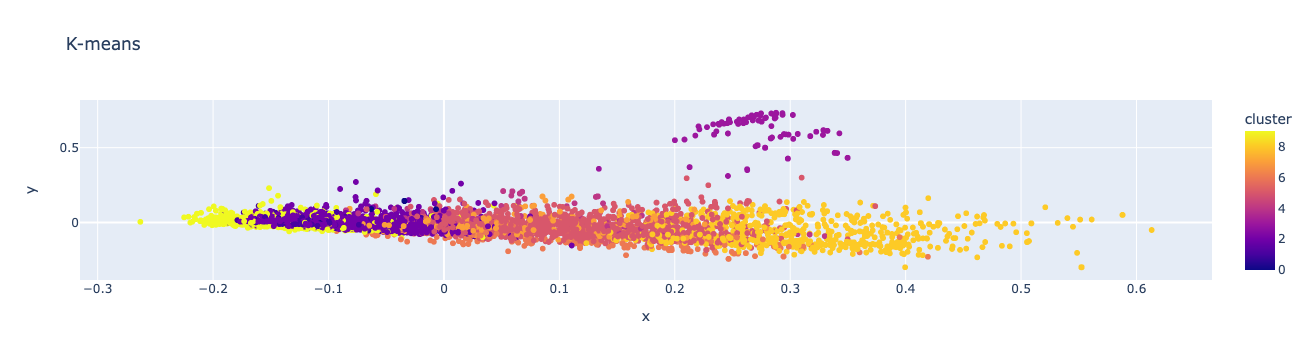

In [77]:
df2['pca'] = df2['tfidf'].pipe(hero.pca)
hero.scatterplot(df2, 'pca', color='cluster', title="K-means")

# Extract keywords in each cluster

In [78]:
clusters=sorted(df2['cluster'].unique().tolist())

In [80]:
# This function summarizes text based on frequency of words.

for i in clusters:
    tmp=[]
    df2[df2['cluster']==i]['message'].apply(lambda x: tmp.append(x))
    sentence=' '.join(tmp)
    paragraph=sent_tokenize(sentence, engine="whitespace+newline")
    kw = find_keyword(paragraph, min_len=1)
    top10_kw = sorted(kw.items(), key=lambda item: item[1], reverse=True)[0:10]
    summary=summarize(sentence, n=1)
    print("cluster: {}".format(i))
    print(top10_kw)
    print(summary)
    print("-"*20)

[('แคป', 199), ('ชัน', 199), ('กัญชา', 126), ('ไลน์', 94), ('สนใจ', 93), ('ทัก', 90), ('เด็ด', 62), ('ออ', 61), ('บุ', 57), ('รี', 57)]
['กัญชาออแกนิค']
----------
[('กัญชา', 680), ('ไม', 273), ('ขาว', 238), ('เพือ', 228), ('อนุทิน', 214), ('พรรค', 157), ('กัญชาเสรี', 141), ('ราง', 139), ('พ.ร.บ.', 113), ('การแพทย์', 113)]
['ไม']
----------
[('กัญชา', 2855), ('กัญชาเสรี', 395), ('ไม', 342), ('วา', 310), ('คน', 238), ('เมา', 228), ('แต', 218), ('อุบล', 208), ('ขาย', 207), ('สง', 199)]
['กัญชาเสรี']
----------
[('กัญชา', 819), ('รัชดา', 386), ('ขาย', 308), ('พันลำ', 262), ('กัญชาออแกนิค', 257), ('ตาง', 254), ('จังหวัด', 254), ('โชค', 187), ('ชัย', 187), ('ซื้อ', 169)]
['กัญชาออแกนิค']
----------
[('กัญชา', 642), ('รังสิต', 590), ('คลอง', 252), ('กรุงเทพ', 201), ('กัญชารังสิต', 168), ('สง', 153), ('มอ', 126), ('กัญชาเสรี', 125), ('หลวง', 121), ('กัญชาอัดแทง', 118)]
['กัญชารังสิต']
----------
[('กัญชา', 4693), ('กัญชากรุงเทพ', 863), ('สง', 710), ('กัญชาออแกนิค', 670), ('กัญชาเสรี', 636), (

# Topic Modeling - LDA(Latent Dirichlet Allocation)

In [81]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [ ]:
# df2['message'][:10].map(str.split)

In [101]:
from collections import defaultdict

stoplist = set('for a of the and to in'.split())

texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in df2['message']
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]
corpus = [dictionary.doc2bow(text) for text in texts]

In [102]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

In [103]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])  # step 2 -- use the model to transform vectors

[(0, 0.7347240238094676), (1, 0.6783661318471206)]


In [104]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [105]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [108]:
# # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
# for doc, as_text in zip(corpus_lsi, df2['message']):
#     print(doc, as_text)a

In [110]:
for idx, topic in lsi_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.243*"กัญชา" + 0.241*"พันลำ" + 0.222*"กัญชาออแกนิค" + 0.222*"กัญชากรุงเทพ" + 0.219*"สง" + 0.208*"กัญชานอก" + 0.189*"ขาย" + 0.181*"กัญชาเชียงใหม" + 0.179*"กัญชาเสรี" + 0.174*"ราคา"
Topic: 1 Word: 0.448*"รัชดา" + 0.267*"จังหวัด" + 0.252*"โชค" + 0.243*"ตาง" + 0.242*"ชัย" + -0.206*"กัญชาเชียงใหม" + 0.166*"พันลำ" + 0.158*"เขต" + 0.155*"ลาดพร้าว" + 0.147*"คลิก"
Topic: 2 Word: 0.356*"รังสิต" + 0.248*"กรุงเทพ" + 0.224*"จังหวัด" + -0.214*"รัชดา" + -0.206*"กัญชาเสรี" + 0.197*"ตาง" + 0.184*"คลอง" + 0.183*"แอด" + 0.180*"ไลน์" + -0.180*"ผา"
Topic: 3 Word: 0.387*"ไม" + 0.286*"แต" + 0.195*"วา" + 0.153*"เสรี" + 0.153*"คน" + 0.137*"ผา" + -0.131*"กัญชาเชียงใหม" + 0.131*"กวา" + 0.126*"สุรา" + -0.125*"กัญชานอก"
Topic: 4 Word: -0.503*"รังสิต" + 0.277*"จังหวัด" + 0.264*"ตาง" + -0.242*"คลอง" + -0.219*"กัญชาเสรี" + -0.168*"หลวง" + 0.153*"กัญชาเชียงใหม" + -0.137*"มอ" + 0.113*"เขต" + 0.112*"เมล็ด"
Topic: 5 Word: 0.342*"กัญชา" + 0.307*"พันลำ" + -0.237*"กัญชาเชียงใหม" + -0.223*"เชียง" + -0.221*"ให

## Ref.

- https://medium.com/@cheng3374/nlp-เบื้องต้น-e5886e8d46b6
- https://blog.pjjop.org/intro-to-nlp-for-air/
- https://www.bualabs.com/archives/2952/what-is-stemming-what-is-lemmatization-different-stemming-lemmatization-nlp-ep-3/
- https://blog.pjjop.org/intro-to-nlp-for-air/
- https://medium.com/homedottech/ใช้lda-topic-modeling-เพื่อแบ่งกลุ่มผู้ใช้เวปไซต์-ตามความสนใจ-294abfc48cd8
- 